In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

### 대출 상환 여부
1. get_dummy()로 purpose 원핫 인코딩
1. PCA로 2차원으로 축소
1. K-Means(2개) 그룹화
1. 산정도로 출력

In [4]:
loan = loans.dropna()

In [19]:
loan.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0


In [20]:
loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [17]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
loans_hot = pd.get_dummies(loan)

In [6]:
# 2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn

In [7]:
pca = PCA(n_components=2).fit(loans_hot)  # 차원 축소
data_pca = pca.transform(loans_hot)
data_pca.shape

(9516, 2)

In [14]:
# k-means로 클러스터링
km = KMeans(n_clusters=2).fit(data_pca)   # 2개로 그룹화
group = km.predict(data_pca)

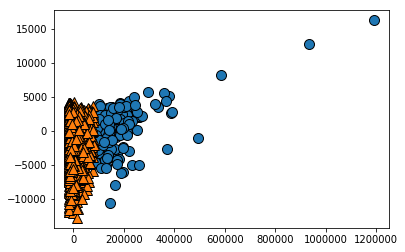

In [15]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)  # 예측

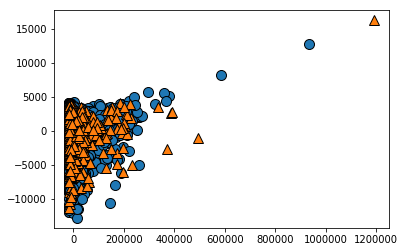

In [16]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], loan.iloc[:,-1])  # 돈 안 갚는 사람

In [ ]:
# 교사학습 - X /Y 나옴, Y 뽑기 힘들다. 성능지표가 나옴.
# 비교사학습 - X 차원 축소, 클러스터링, 성능이 많이 낮다. Y가 없음. 평가자 없음. hilevel, 무엇이든지 할 수 있음.